In [30]:
import numpy as np

In [31]:
import os
from tqdm import tqdm
import cv2

airplane = '/kaggle/input/natural-images/natural_images/airplane'
car = '/kaggle/input/natural-images/natural_images/car'
cat = '/kaggle/input/natural-images/natural_images/cat'
dog = '/kaggle/input/natural-images/natural_images/dog'
flower = '/kaggle/input/natural-images/natural_images/flower'
fruit = '/kaggle/input/natural-images/natural_images/fruit'
motor = '/kaggle/input/natural-images/natural_images/motorbike'
person = '/kaggle/input/natural-images/natural_images/person'



features = []

for img in tqdm(os.listdir(airplane)):
    img_path = os.path.join(airplane,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)
    
    
for img in tqdm(os.listdir(car)):
    img_path = os.path.join(car,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)
    
for img in tqdm(os.listdir(cat)):
    img_path = os.path.join(cat,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)
    
for img in tqdm(os.listdir(dog)):
    img_path = os.path.join(dog,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)

for img in tqdm(os.listdir(fruit)):
    img_path = os.path.join(fruit,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)
    
for img in tqdm(os.listdir(flower)):
    img_path = os.path.join(flower,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)

for img in tqdm(os.listdir(motor)):
    img_path = os.path.join(motor,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)

for img in tqdm(os.listdir(person)):
    img_path = os.path.join(person,img)
    image_feature = cv2.imread(img_path)
    image_feature = cv2.resize(image_feature, (224,224))
    features.append(image_feature)

100%|██████████| 986/986 [00:02<00:00, 337.45it/s]


In [32]:
import numpy as np
X = np.array(features)

X.shape

(6899, 224, 224, 3)

In [33]:
labels = []

for img in os.listdir(airplane):
    labels.append(0)
    
for img in os.listdir(car):
    labels.append(1)
    
for img in os.listdir(cat):
    labels.append(2)
    
for img in os.listdir(dog):
    labels.append(3)

for img in os.listdir(flower):
    labels.append(4)
    
for img in os.listdir(fruit):
    labels.append(5)

for img in os.listdir(motor):
    labels.append(6)
    
for img in os.listdir(person):
    labels.append(7)


In [34]:
y = np.array(labels)

In [35]:
y.shape

(6899,)

In [36]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [37]:
X_train.shape

(5519, 224, 224, 3)

In [38]:
X_test.shape

(1380, 224, 224, 3)

In [39]:
X_trainS = (X_train - X_train.min())/(X_train.max() - X_train.min())
X_testS = (X_test - X_test.min())/(X_test.max() - X_test.min())

In [40]:
from keras.utils import to_categorical

y_trainE = to_categorical(y_train)
y_testE = to_categorical(y_test)

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │     8,652,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,024,074 (34.42 MB)

 Trainable params: 9,024,074 (34.42 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │     8,652,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,024,074 (34.42 MB)

 Trainable params: 9,024,074 (34.42 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [45]:
model.fit(X_trainS,y_trainE,epochs=10,
         validation_data = (X_testS,y_testE))

Epoch 1/10
  1/173 ━━━━━━━━━━━━━━━━━━━━ 20:07 7s/step - accuracy: 0.0625 - loss: 2.1729

W0000 00:00:1711090806.662721     890 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2101 - loss: 2.3654

W0000 00:00:1711090833.079430     891 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


173/173 ━━━━━━━━━━━━━━━━━━━━ 35s 162ms/step - accuracy: 0.2109 - loss: 2.3620 - val_accuracy: 0.6341 - val_loss: 1.0156
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.7475 - loss: 0.7531 - val_accuracy: 0.8348 - val_loss: 0.5374
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.8280 - loss: 0.4786 - val_accuracy: 0.8500 - val_loss: 0.4125
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.8542 - loss: 0.3938 - val_accuracy: 0.8616 - val_loss: 0.3836
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 0.8751 - loss: 0.3348 - val_accuracy: 0.8514 - val_loss: 0.4290
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.8834 - loss: 0.3112 - val_accuracy: 0.8587 - val_loss: 0.3835
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 17s 101ms/step - accuracy: 0.8956 - loss: 0.2829 - val_accuracy: 0.8703 - val_loss: 0.3810
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step - accuracy: 0.9005 - loss: 0.2650 - val

In [46]:
model.evaluate(X_trainS,y_trainE)

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9556 - loss: 0.1476


[0.15295511484146118, 0.9527088403701782]

In [47]:
model.evaluate(X_testS,y_testE)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8794 - loss: 0.3295


[0.372887521982193, 0.8666666746139526]

In [48]:
feat = ["airplane","car","cat","dog","flower","fruit","motor","person"]

In [49]:
np.argmax(model.predict(X_testS[3].reshape(1,224,224,3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


4

In [50]:
print(feat[np.argmax(model.predict(X_test[3].reshape(1,224,224,3)))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
fruit


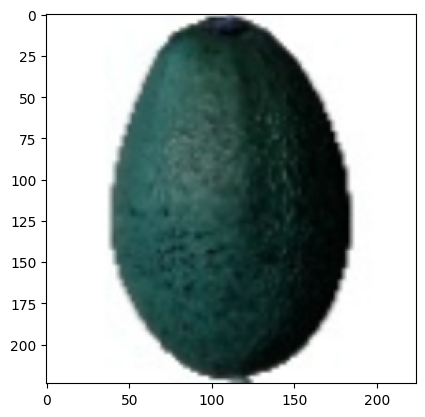

In [51]:
import matplotlib.pyplot as plt
plt.imshow(X_test[3])
plt.show()

In [52]:
print(feat[np.argmax(model.predict(X_test[0].reshape(1,224,224,3)))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
fruit


In [53]:
print(feat[np.argmax(model.predict(X_test[0].reshape(1,224,224,3)))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
fruit


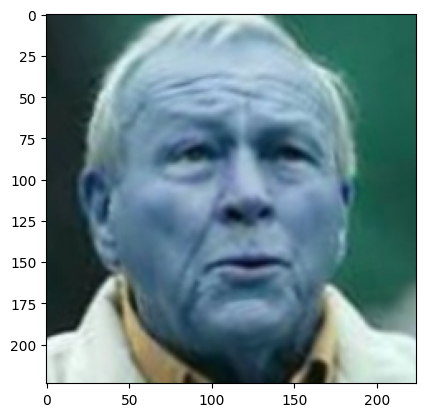

In [54]:
plt.imshow(X_test[0])
plt.show()

In [55]:
model.save("Fruits.h5")